# **Part 1**

# Lesion Extraction and Volumetric Features Analysis

## Introduction

Welcome to the Lesion Extraction and Volumetric Features Analysis notebook. This notebook presents a powerful tool for automating the extraction of lesions and analyzing their volumetric features from medical imaging data.

The primary goal of this tool is to streamline the process of lesion extraction, making it faster and more efficient. By leveraging advanced algorithms and image processing techniques, it enables accurate identification and extraction of lesions, along with the extraction of key volumetric features.

In this notebook, we will walk through the essential functions of the tool, showcasing its capabilities for rapid lesion extraction. While we focus on demonstrating important functions for extraction, detailed documentation for each sub-function is available in the tool's README. This documentation is particularly useful for those interested in developing custom pipelines tailored to specific requirements.

To illustrate the tool's effectiveness, we will perform lesion extraction on example datasets representing five patients. Subsequently, we will conduct a brief exploration of the pathology by analyzing the extracted characteristics. This analysis aims to highlight the tool's medical relevance for both individual patient monitoring and population-level studies.

Through this notebook, we aim to demonstrate how this tool can significantly benefit medical professionals by providing a reliable and efficient means of lesion analysis, ultimately improving patient care and facilitating research in medical imaging.

---

**Note:** For detailed instructions on using specific functions or customizing the extraction pipeline, please refer to the accompanying documentation available in the tool's README.


In [31]:
"""
We import the libraries we will use.
We will use the utils.py and part1.py that contains our automatic tool.
If not already installed on your system, you can install the pandas, matiplotlib, numpy and seaborn libraries with the following commands:
    > pip install pandas
    > pip install matplotlib
    > pip install numpy
    > pip install seaborn
"""
from our_tools import utils
from our_tools import part1
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

## Configuration

Before proceeding with the extraction and analysis, let's set up the necessary configurations:

- **Base Folder:** The root directory where the MRI images are stored.
- **Subfolder Structure:** The format of subfolders containing MRI images for each patient.
- **Patient Numbers:** Unique identifiers for each patient.
- **Patient Personal Summary Path:** Path for individual patient summary CSV files.
- **Patients Summary Path:** Path for the overall summary CSV file containing data from all patients.

These configurations will ensure proper organization and accessibility of data throughout the extraction and analysis process.

This specific configuration corresponds to the example file tree in this demo folder.

In [32]:
base_folder = "./data/"
subfolder_structure = "sub-MSPA{}_warped/"
patient_numbers = ["007", "018", "027", "032", "034"]

patient_personal_summary_path = "./results/patient_{}_summary.csv"
patients_summary_path = "./results/all_summary.csv"

## Automated Extraction Pipeline

To initiate the automated extraction pipeline of our tool, we call the following function:

In [33]:
part1.automatic_extraction_of_volumetric_features(base_folder, subfolder_structure, patient_numbers, patient_personal_summary_path, patients_summary_path)

This function executes the predefined pipeline to automatically extract volumetric features from MRI images for each patient. Upon execution of this cell, the CSV files specified in the configuration will be generated, containing the extracted data.

## Loading and Displaying CSV Data

We will now load one of the CSV files using the Pandas library and display the first 5 rows for patient "007". Additionally, we will load the summary file containing data for all patients and display the first 5 rows.

In [34]:
# Load CSV file for patient "007"
patient_007_data = pd.read_csv(patient_personal_summary_path.format("007"))
print("First 5 rows of data for patient '007':")
patient_007_data.head()

First 5 rows of data for patient '007':


,Lesion,Volume (mm³),Surface (mm²),Compactness
0,1,33442.875,16976.032471,0.025855
1,2,23.625,65.945675,0.220109
2,3,310.500,553.332424,0.064360
3,4,124.875,194.210747,0.240760
4,5,20.250,38.971145,0.783561


In [35]:
# Load summary file for all patients
all_patients_summary = pd.read_csv(patients_summary_path)
print("\nFirst 5 rows of summary data for all patients:")
all_patients_summary.head()


First 5 rows of summary data for all patients:


,Patient,Intracranial Volume (mm³),Number of lesions,Total lesion load [%],Total lesion volume (mm³),Average lesion volume (mm³),Std lesion volume (mm³),Total lesion surface (mm²),Average lesion surface (mm²),Std lesion surface (mm²),Average lesion compactness,Std lesion compactness
0,7,1798814.250,35,3.951353,71077.500,2030.785714,7633.410470,41721.196302,1192.034180,3913.321393,0.605979,1.260312
1,18,1777467.375,41,4.607743,81901.125,1997.588415,8384.489542,46873.381069,1143.253197,4416.483264,0.680609,1.133310
2,27,1784268.000,49,1.977408,35282.250,720.045918,2065.461571,30327.476842,618.928099,1542.916277,1.532557,2.893122
3,32,1785132.000,41,0.720892,12868.875,313.875000,587.842479,13321.349478,324.910963,466.005993,1.277639,3.423703
4,34,1782600.750,37,0.709420,12646.125,341.787162,847.259505,14868.017235,401.838304,942.558768,0.809600,1.447265


We can see that our tool is well able to extract lesions and their volumetric characteristics.

## Exploring Disease Characteristics

Now that we have the data at our disposal, it's essential to understand that the analyses presented here are merely illustrative. Typically, the specific analyses performed using this tool would be designed by the individuals or teams intending to utilize it in their research or clinical practice.

These analyses serve as a demonstration of the tool's capabilities and the types of insights that can be derived from the volumetric features extracted from MRI images. However, it's crucial to emphasize that the precise nature of the analyses would be determined by the expertise and objectives of the users.

Medical professionals, researchers, or analysts would tailor the analyses to address specific research questions, clinical hypotheses, or patient monitoring needs. These individuals would apply their domain knowledge to interpret the results within the context of the disease under investigation.

In summary, while this exploration provides a glimpse into the potential applications of the tool, the actual analyses performed would be guided by the users' expertise and objectives, ensuring that the insights obtained are relevant and meaningful within the medical and research context.

### Visualizing Brain Segmentation Results

Before proceeding with statistical analyses on the extracted data, it's valuable to visualize the brain segmentation results obtained from the probability maps. These visualizations provide an intuitive understanding of how the tool classifies voxels into different brain regions based on the probability maps.

By inspecting these segmented brain images, users can gain insights into the effectiveness of the segmentation process and the accuracy of the classifications made by the tool. This visualization step aids in assessing the quality of the segmentation and ensures confidence in the subsequent analyses conducted on the extracted volumetric features.


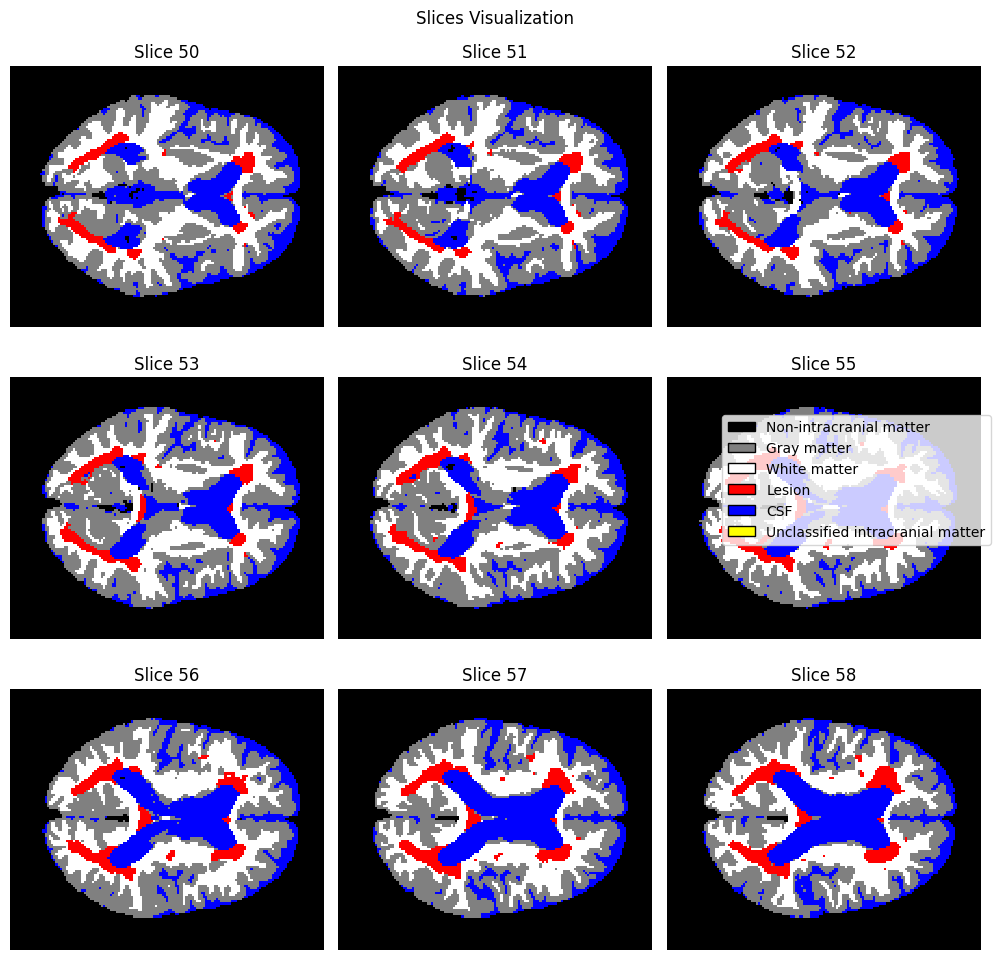

In [36]:
"""
Tool functions are used to obtain the segmentation map for patient 007.
"""
patient_folder = base_folder + subfolder_structure.format("007")
patient_maps, probability_affine = part1.get_probability_maps(patient_folder)
patient_brain = part1.classify_voxels(patient_maps)

utils.plot_slices(patient_brain, range(50, 59))

### Analysis of patient 007

#### Impact of the volume threshold on lesion detection

The first analysis conducted investigates the impact of the threshold on the minimum lesion volume on the number of lesions detected. We vary the threshold and observe the variation in the number of detected lesions. Decreasing the threshold is expected to increase sensitivity at the cost of lower specificity.

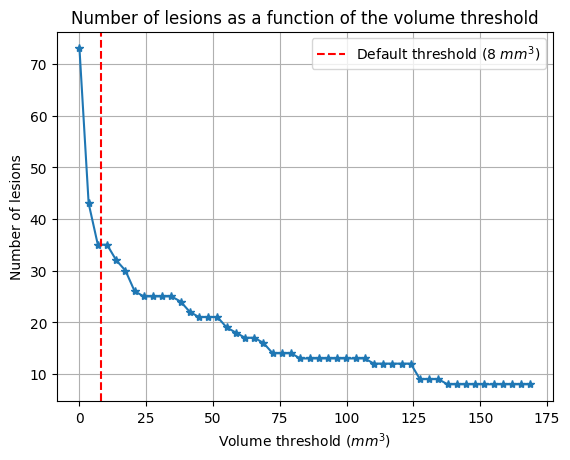

In [37]:
voxel_volume, voxel_surface = part1.get_voxel_properties(probability_affine)

lesions_nbr = []
volume_thresholds = np.linspace(0, 50, 50)  * voxel_volume

patient_lesion_map = patient_brain == 3 #c3
patient_segmented_lesion_map, patient_lesion_properties = part1.get_segmentation_and_properties(patient_lesion_map)
for volume_threshold in volume_thresholds:
    _, filtered_patient_lesion_properties = part1.filter_lesion(patient_segmented_lesion_map, patient_lesion_properties, voxel_volume, min_volume=volume_threshold)
    lesions_nbr.append(len(filtered_patient_lesion_properties))

plt.figure()
plt.plot(volume_thresholds, lesions_nbr, '*-')
plt.axvline(8, color='r', linestyle='--', label=r"Default threshold (8 $mm^3$)")
plt.xlabel(r"Volume threshold ($mm^3$)")
plt.ylabel("Number of lesions")
plt.title("Number of lesions as a function of the volume threshold")
plt.legend()
plt.grid()
plt.savefig("007_volume_threshold_analysis.svg", format='svg')
plt.show()

As anticipated, increasing the threshold leads to a decrease in the number of detected lesions. Additionally, it's noteworthy that the default threshold value effectively distinguishes between a rapid decline in lesion count and a slower decrease. This observation suggests a high prevalence of very small lesions, making the results more sensitive to lower threshold values than higher ones.

#### Impact of the matter confidence threshold  on the nature of voxel
We have established a threshold for voxel classification, ensuring confidence in determining the voxel's nature when surpassing this threshold. This threshold was chosen to be set at 20% but the choice of the threshold can be discussed. 

The second analysis conducted investigates the impact of the confidence threshold about the nature of voxels on the number of lesions detected. We proceed in the same way than for the analysis of the volume threshold : varying the threshold and observing the number of lesions detected. 


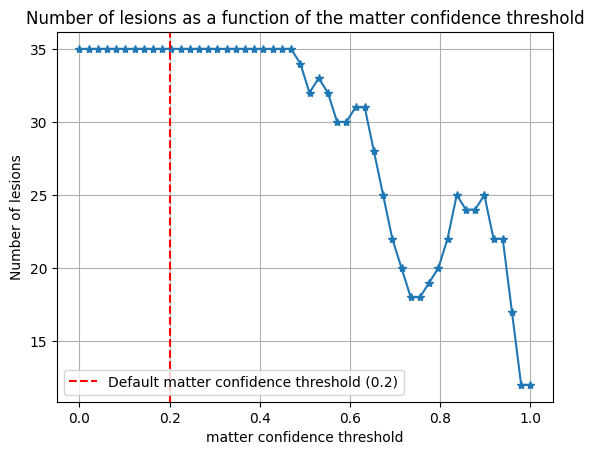

In [38]:
patient_folder = base_folder + subfolder_structure.format("007")
patient_maps, probability_affine = part1.get_probability_maps(patient_folder)
matter_confidence_threshold = np.linspace(0,1,50)
lesions_nbr = []

for i in matter_confidence_threshold:
    patient_brain = part1.classify_voxels(patient_maps,0.5,i)
    patient_lesion_map = patient_brain == 3 #c3
    patient_segmented_lesion_map, patient_lesion_properties = part1.get_segmentation_and_properties(patient_lesion_map)
    _, filtered_patient_lesion_properties = part1.filter_lesion(patient_segmented_lesion_map, patient_lesion_properties, voxel_volume)
    lesions_nbr.append(len(filtered_patient_lesion_properties))

plt.figure()
plt.plot(matter_confidence_threshold, lesions_nbr, '*-')
plt.axvline(0.2, color='r', linestyle='--', label=r"Default matter confidence threshold (0.2)")
plt.xlabel(r"matter confidence threshold")
plt.ylabel("Number of lesions")
plt.title("Number of lesions as a function of the matter confidence threshold")
plt.legend()
plt.grid()
plt.savefig("007_matter_threshold_analysis.svg", format='svg')
plt.show()


### Correlations between variables

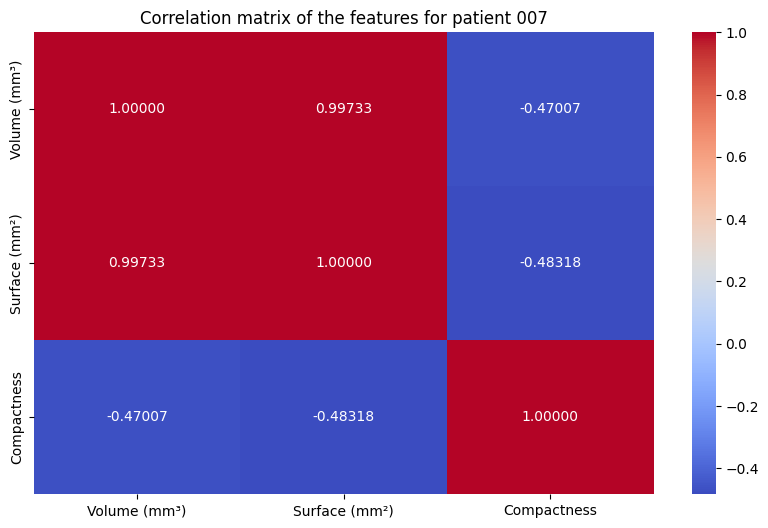

In [39]:
_, filtered_patient_lesion_properties = part1.filter_lesion(patient_lesion_map, patient_lesion_properties, voxel_volume)
patient_results = part1.transform_properties_into_metrics(filtered_patient_lesion_properties, voxel_volume, voxel_surface)

plt.figure(figsize=(10, 6))
sns.heatmap(patient_results.corr(), annot=True, cmap='coolwarm', fmt=".5f")
plt.title('Correlation matrix of the features for patient 007')
plt.savefig("007_correlation_matrix.svg", format='svg')
plt.show()

Surface area and volume are very strongly - almost perfectly - correlated: an increase in lesion volume seems to be coupled with an increase in surface area. Another very interesting result is the negative correlation between volume (surface area) and compactness. This correlation is not perfect, indicating that the relationship is not perfectly linear and systematic. An increase in volume is accompanied by a decrease in compactness. This result is not surprising in a discrete world, where it is easier to deviate from a perfect sphere when the characteristic scale of the lesion is larger than that of a voxel. 

### Pairplot of the variables

The pairplot of the variables enables us to quickly explore the data distributution and relationships.

<Figure size 1000x600 with 0 Axes>

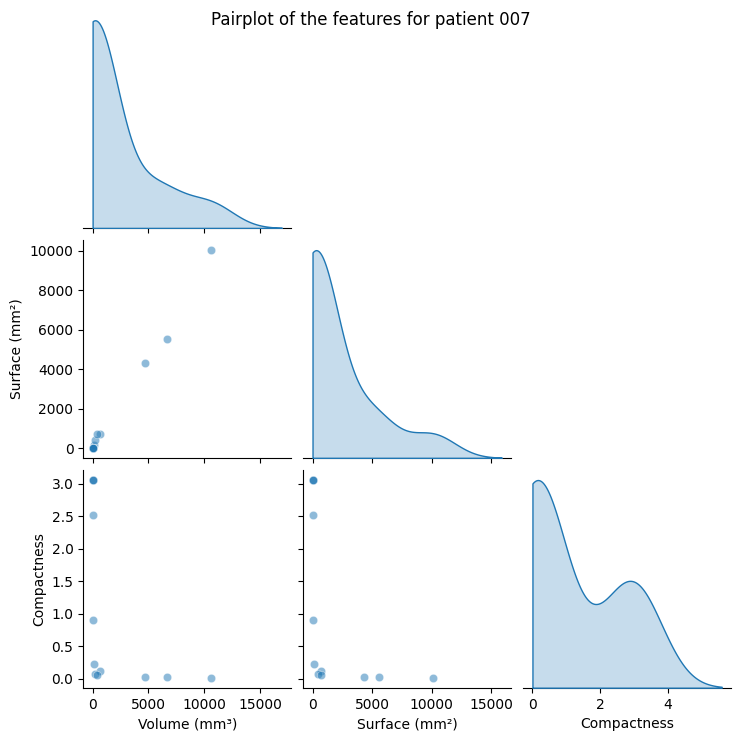

In [40]:
plt.figure(figsize=(10, 6))
sns.pairplot(patient_results, kind='scatter', diag_kind='kde', corner=True, plot_kws={'alpha': 0.5}, diag_kws={'fill': True, 'clip': (0, None)}, markers='o')
plt.suptitle('Pairplot of the features for patient 007')
plt.savefig("007_pairplot.svg", format='svg')
plt.show()